# 1 - INTRODUCTION


**Nama  : Enggar Kristian** 

**Batch : FTDS - 012** 

**Dataset   : WA_Fn-UseC_-Telco-Customer-Churn.csv**

**Objective : Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :**

    Mampu memahami konsep Artificial Neural Network.
    Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
    Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
    Mampu menganalisis dan menjelaskan layer yang dibuat.

**Milestone 1 - Phase 2** 




# 2 - IMPORT LIBRARIES

In [154]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [155]:
!ls "/content/gdrive/My Drive/tf_serving"

titanic


In [156]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib
import pickle
import plotly.express as px
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_validate
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from pathlib import Path


# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from imblearn.pipeline import make_pipeline 
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer

# Evaluate Regression Models
from sklearn.metrics import mean_squared_error

# Evaluate Classification Models
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

from sklearn.preprocessing import PolynomialFeatures

# Censoring Outliers
from feature_engine.outliers import Winsorizer

# import gridsearchcv
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


import tensorflow as tf 
from tensorflow import keras
import pathlib
from sklearn.metrics import confusion_matrix ,accuracy_score
np.random.seed(15)
tf.random.set_seed(15)


# 3 - DATA LOADING

Dataset taken reference from https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv

## Description 
Telcom Customer Churn

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

### Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
### Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

    Customers who left within the last month – the column is called Churn
    Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    Demographic info about customers – gender, age range, and if they have partners and dependents

### Inspiration

To explore this type of models and learn more about the subject.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

## Objectives 

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.


In [158]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [159]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [160]:
data.shape

(7043, 21)

In [161]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [163]:
# Know about unique all columns in dataset
for col in data:
    print(f'{col}: {data[col].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

There's anomaly data from colum TotalCharge, it should be a numeric column, but its show an object column.

In [164]:
# Copy dataset that can use to modification dataset
data_copy = data.copy() 

In [165]:
data_copy.drop(columns='customerID', axis=1, inplace=True)
data_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [166]:
# Change label target to numeric
data_copy['Churn'].replace({'Yes':1,'No':0},inplace=True)

In [167]:
# change column TotalCharges to numeric
data_copy["TotalCharges"] = pd.to_numeric(data_copy["TotalCharges"], errors="coerce")

In [168]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


well approve there's anomaly data with column TotalCharges, it should be float data but in raw dataset describe object. Then i convert from object to float on column TotalCharges, after did that i found missing values, that will be handled in chapter Preprocessing and sub chapter handling missing values.

# 4 - EXPLORATORY DATA ANALYSIS (EDA)

## What is Churn?

Churn is the loss of customers from a business. Churn is calculated by how many customers leave your business in a given time. Customer turnover is important for businesses to know because it is a picture of the success of a business in retaining customers. 

Reference : https://blog.usetada.com/id/apa-itu-customer-churn-dan-bagaimana-menghentikannya

## Charges

Some Costumer in logic they will churn because their charge is too big or maybe they are can not pay for their charge next month depends tenure. Talking about invoices in other words the column is numeric, so the columns associated with the bill are 'Tenure', 'MonthlyCharges', 'TotalCharges' 

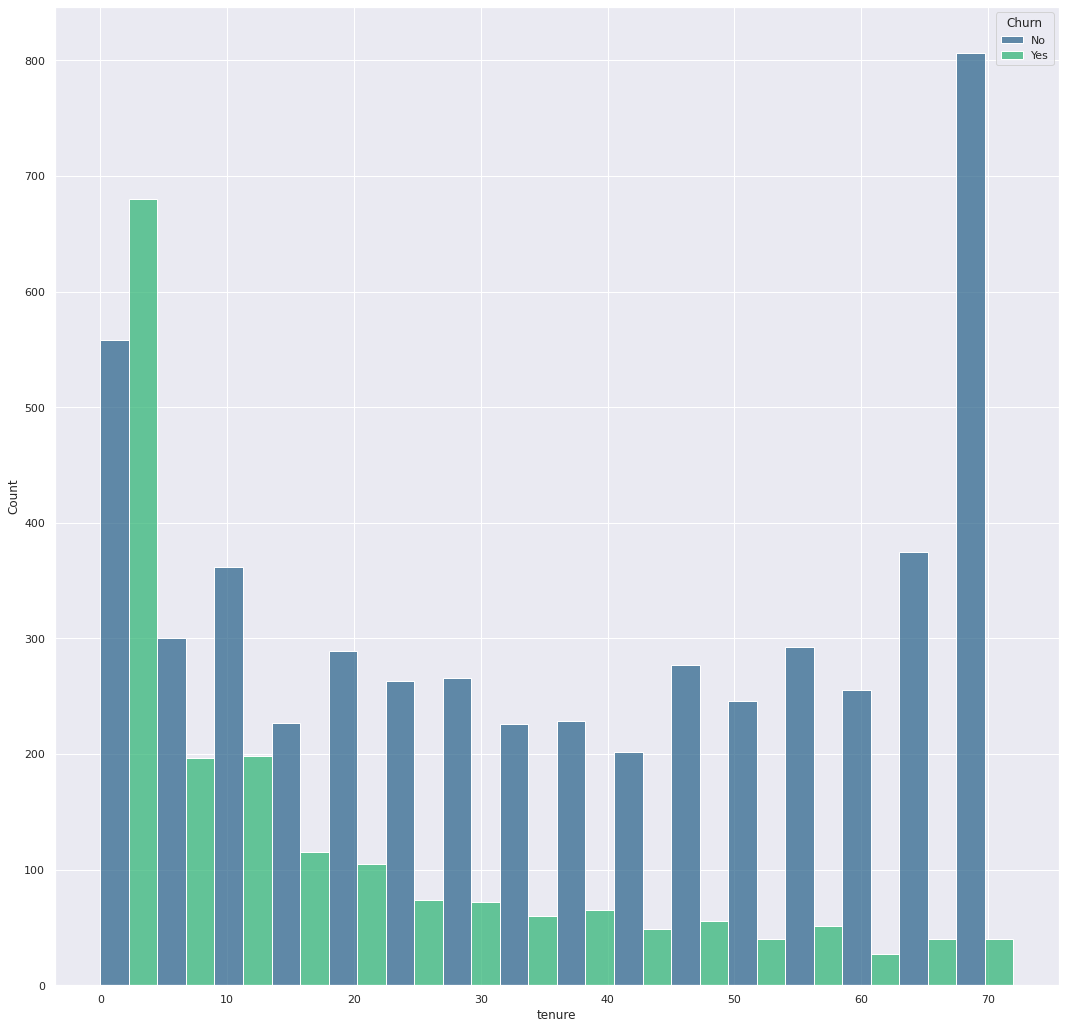

In [169]:
# Tenure impact to churn
sns.histplot(x='tenure',data=data,multiple="dodge",hue='Churn', palette = 'viridis')

Of course, the less tenure, our customers will have the potential to Churn. And vice versa, the longer the tenure, of course the customer will be able to pay and there is no potential for Churn.

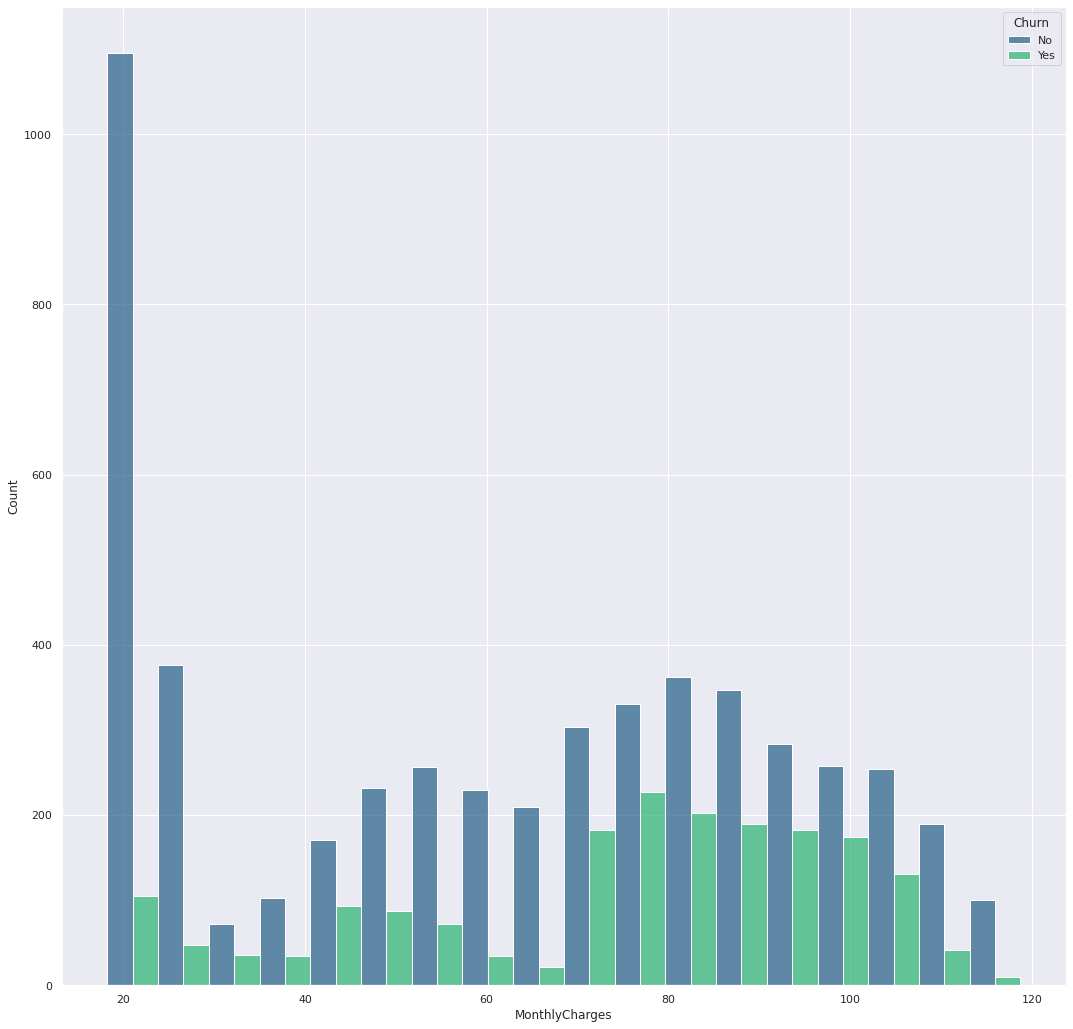

In [170]:
# Monthly Charges impact to churn
sns.histplot(x='MonthlyCharges',data=data,multiple="dodge",hue='Churn',palette = 'viridis')

As we can see from the graph, from monthly charges costumer there's no dominant plot showing churn's potential. In other words, customers with any nominal monthly charges to pay with any subscription are able to pay the charges

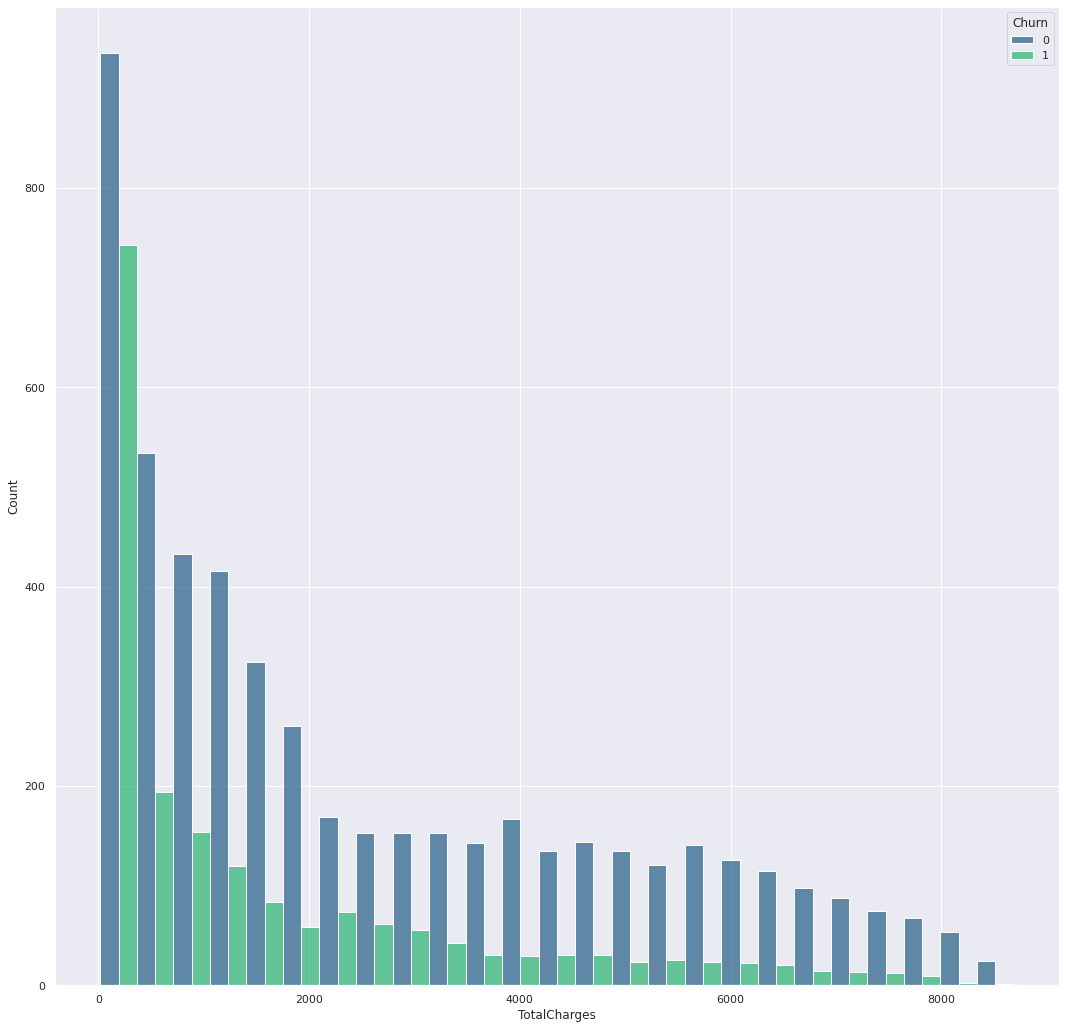

In [171]:
# Total Charges impact to churn
sns.histplot(x='TotalCharges',data=data_copy,multiple="dodge",hue='Churn',palette = 'viridis')

The TotalCharges column is the product of the Tenure column with MonthlyCharges. So based on the tenure chart above, the less tenure the customer has the potential to Churn, as well as the TotalCharges column.

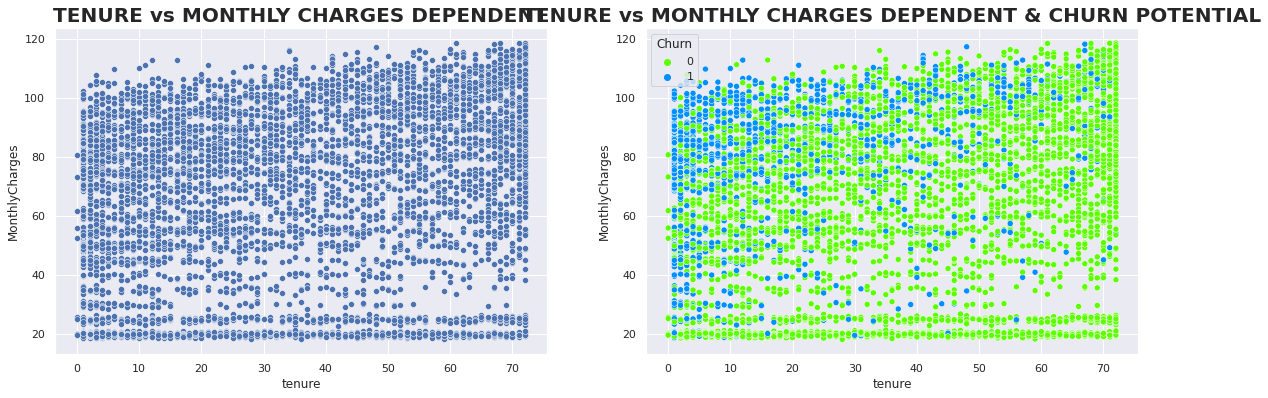

In [172]:
# PURCHASES vs PURCHASES_TRX

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='tenure',y='MonthlyCharges', data=data_copy)
plt.title('TENURE vs MONTHLY CHARGES DEPENDENT',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='tenure',y='MonthlyCharges',hue='Churn', data=data_copy, palette='gist_rainbow')
plt.title('TENURE vs MONTHLY CHARGES DEPENDENT & CHURN POTENTIAL',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

See TotalCharges the TotalCharges column has something to do with tenure with monthly charges, regardless of how much you pay in one month, but if the tenure is short, the customer will potentially Churn.

## Gender

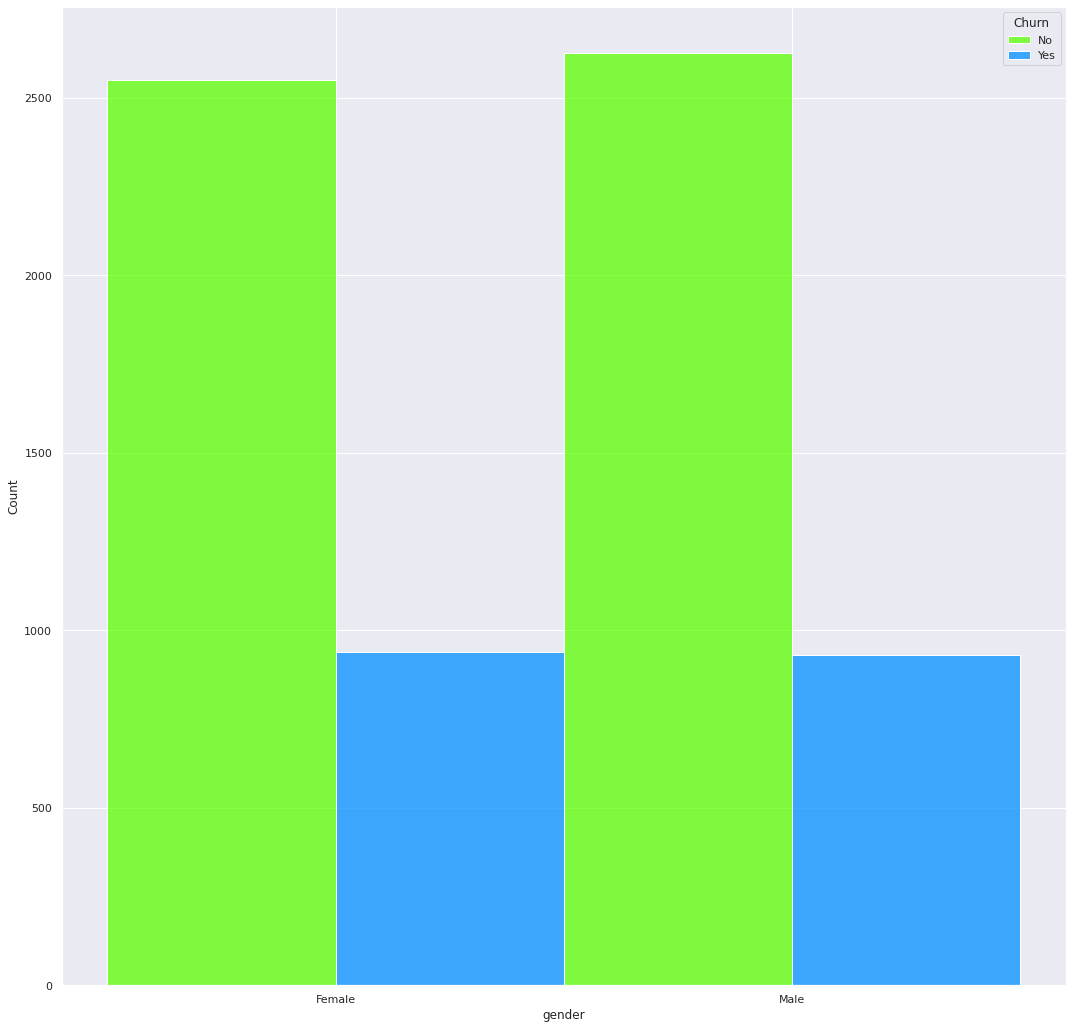

In [173]:
# Gender impact to churn
sns.histplot(x='gender',data=data,multiple="dodge",hue='Churn', palette = 'gist_rainbow')

There is no significant difference between males and females with high potential Churn.

## Subscribe

Text(0.5, 1.0, 'Costumer Subscribe Phone Service')

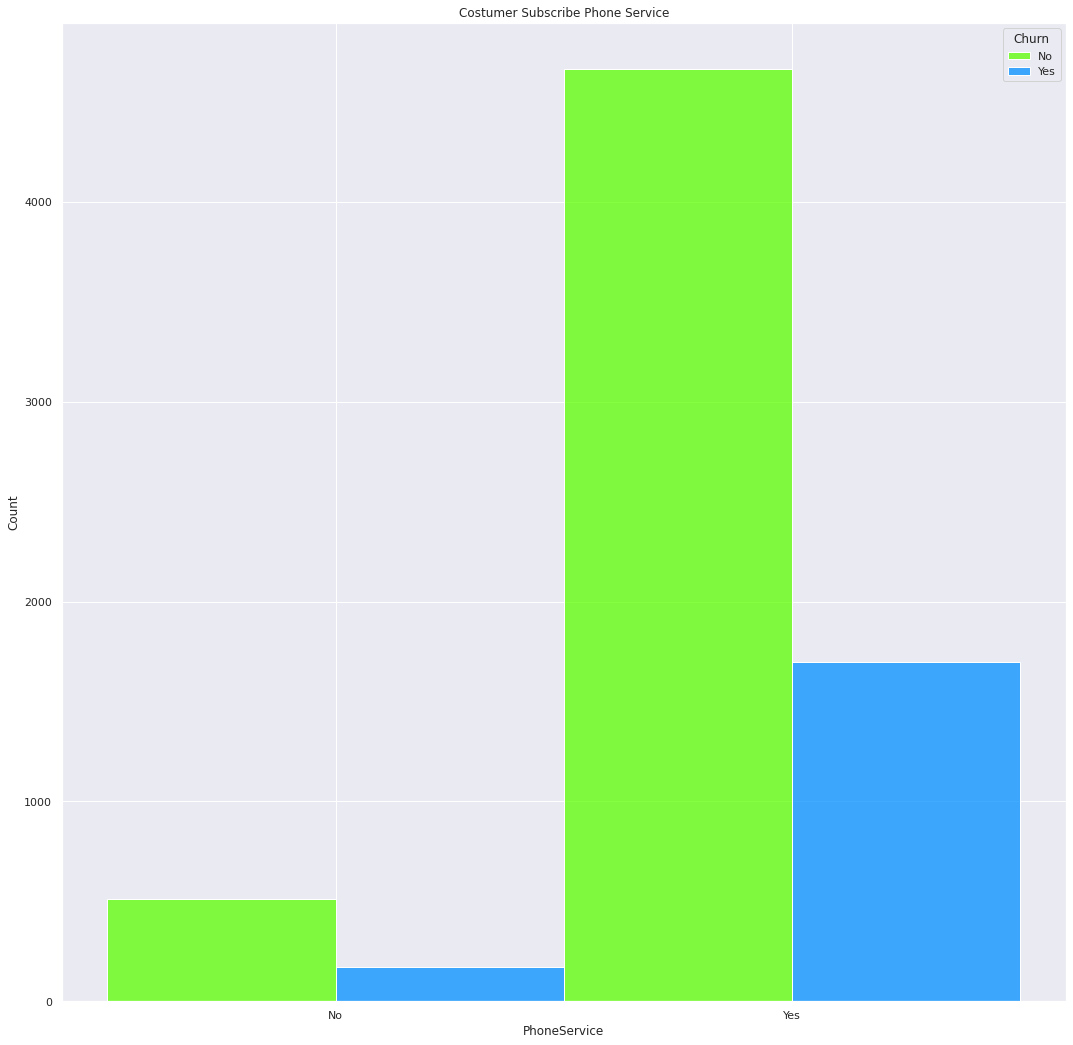

In [174]:
# Phone Service impact to churn
sns.histplot(x='PhoneService',data=data,multiple="dodge",hue='Churn', palette = 'gist_rainbow')
plt.title('Costumer Subscribe Phone Service')

Costumer have many subscribe Phone Service but low potential churn.

Text(0.5, 1.0, 'Costumer Subscribe Multiple Lines')

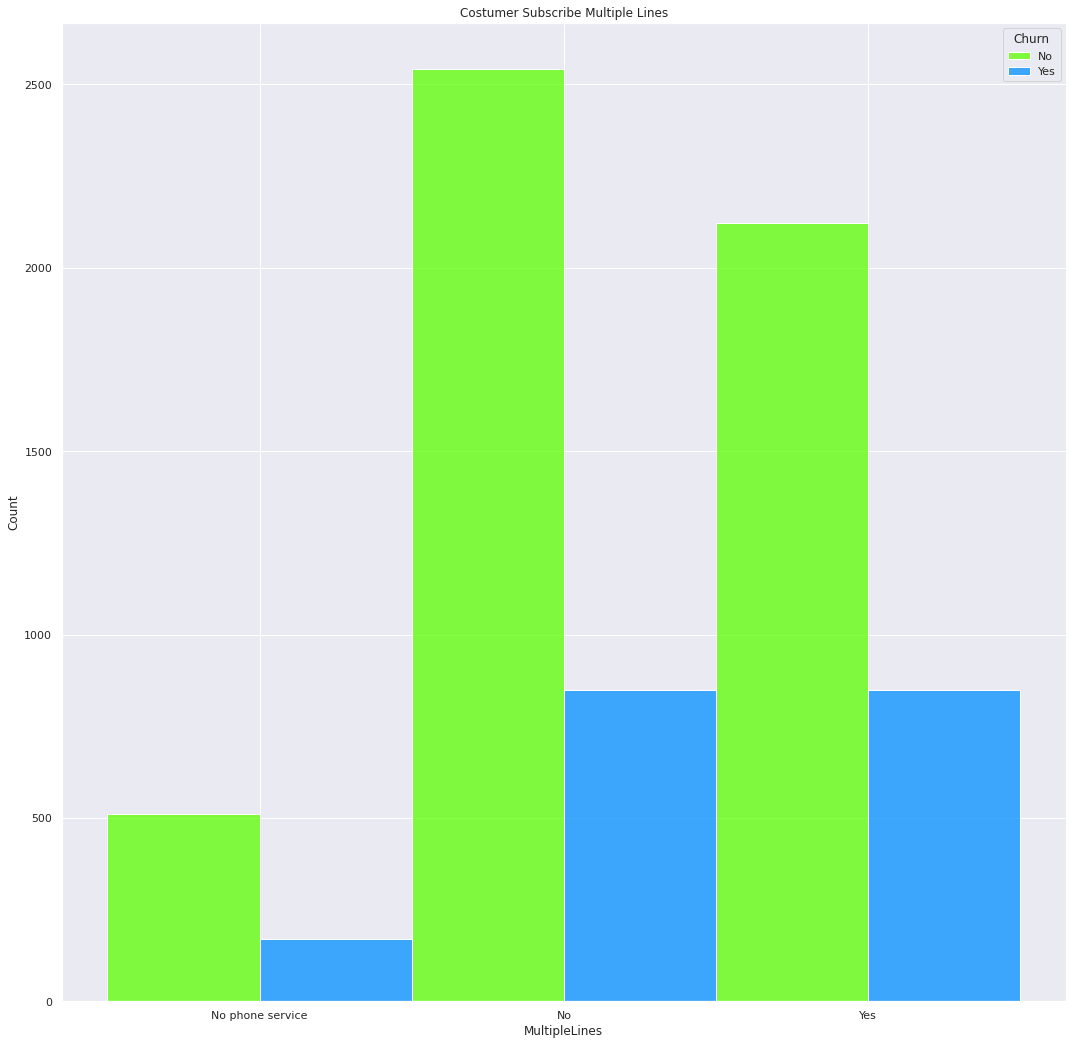

In [175]:
# Multiple Lines impact to churn
sns.histplot(x='MultipleLines',data=data,multiple="dodge",hue='Churn', palette = 'gist_rainbow')
plt.title('Costumer Subscribe Multiple Lines')

In this section, our costumers many not subscribe Multiple Lines, but low potential Churn.

Text(0.5, 1.0, 'Costumer Subscribe Internet Service')

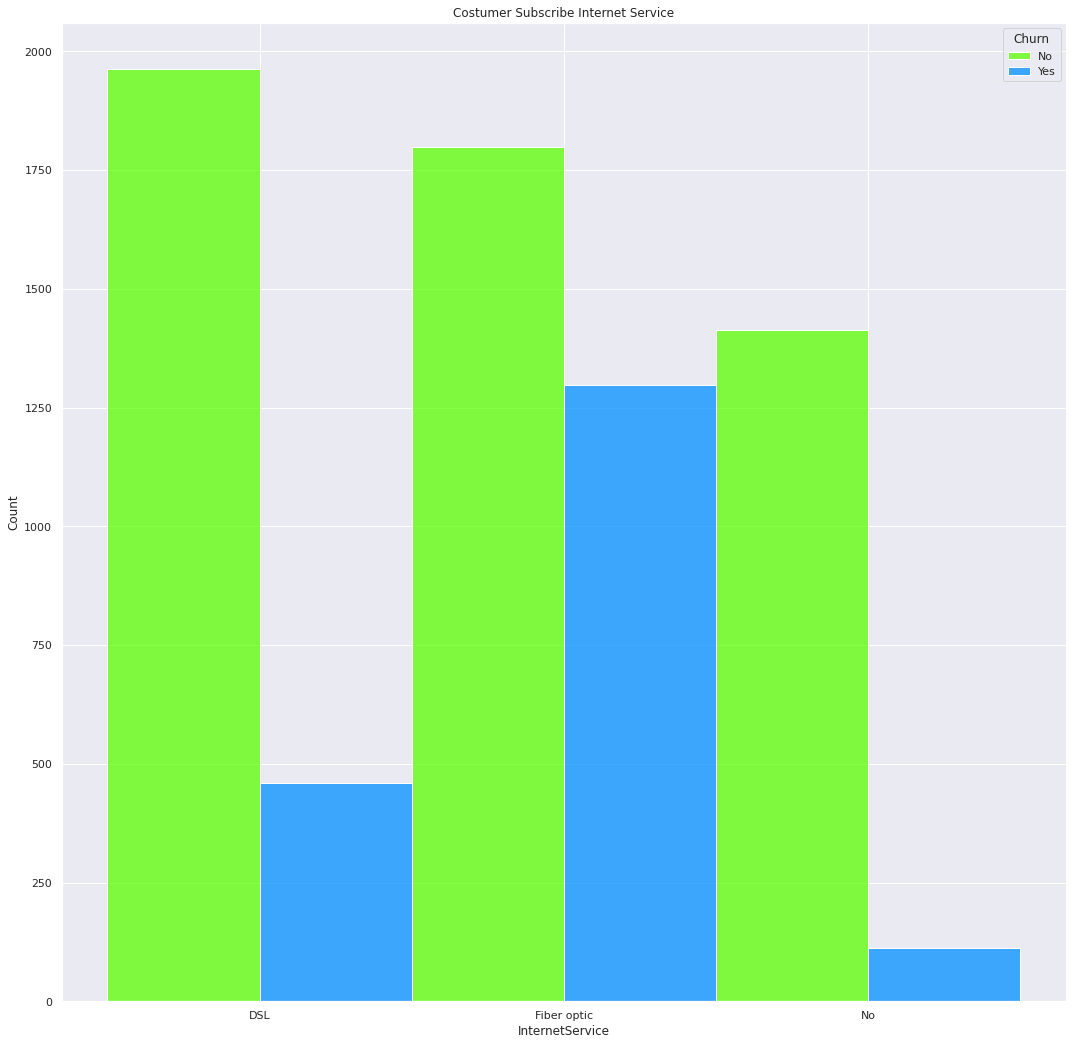

In [176]:
# Internet Service impact to churn
sns.histplot(x='InternetService',data=data,multiple="dodge",hue='Churn', palette = 'gist_rainbow')
plt.title('Costumer Subscribe Internet Service')

Our costumers many subscribe with kind of Internet Service is DSL, but low potential Churn. But if they are use service Fiber Optic more high than DSL to Churn.

of the three subscriptions above, it is enough to show that subscribing to any service does not have a big impact on the customer for Churn

## Balance binary classification Data

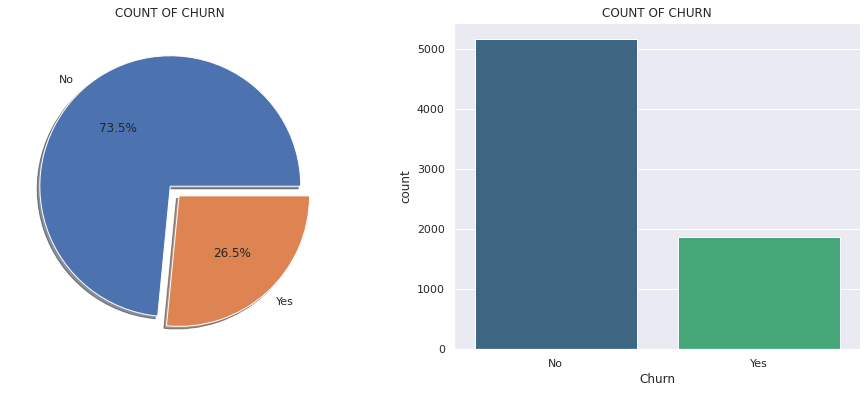

In [177]:
f,ax=plt.subplots(1,2,figsize=(16,6))
data['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('COUNT OF CHURN')
ax[0].set_title('COUNT OF CHURN')
ax[0].set_ylabel('')
sns.countplot('Churn',data=data,ax=ax[1], palette = 'viridis')
ax[1].set_title('COUNT OF CHURN')
plt.show()

As we can see the graph, it shows kind of target is binary classification between Yes or No but in modeling i rename to integer No = 0 and Yes = 1. Data clearly imbalance, it will be influence to result a model, don't worry definetely i will do improvement model with oversampling. 

# 5 - DATA PREPROCESSING

In [178]:
# Get Data for Model Inference

random_state = 15
data_inf = data_copy.sample(100, random_state=random_state)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5545,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),86.55,1857.25,0
1657,Male,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.60,901.25,0
2218,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.00,5999.85,0
4392,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.20,19.20,0
1461,Male,0,Yes,No,22,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,No,Month-to-month,No,Credit card (automatic),95.90,2234.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Male,1,Yes,No,61,Yes,Yes,DSL,No,Yes,No,No,No,Yes,One year,No,Bank transfer (automatic),64.05,3902.60,0
5993,Male,0,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,74.95,151.75,0
164,Female,0,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,0
6780,Male,0,Yes,Yes,13,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),44.80,559.20,0


In [179]:
# Remove Inference-Set from Dataset

data_train_test = data_copy.drop(data_inf.index)
data_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [180]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),86.55,1857.25,0
1,Male,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.60,901.25,0
2,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.00,5999.85,0
3,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.20,19.20,0
4,Male,0,Yes,No,22,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,No,Month-to-month,No,Credit card (automatic),95.90,2234.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,1,Yes,No,61,Yes,Yes,DSL,No,Yes,No,No,No,Yes,One year,No,Bank transfer (automatic),64.05,3902.60,0
96,Male,0,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,74.95,151.75,0
97,Female,0,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,0
98,Male,0,Yes,Yes,13,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),44.80,559.20,0


Prepare some data inference with 100 rows is enough to do predict later.

## Splitting Dataset

In [181]:
# Split antara `X` (Features) dan `y` (Target)

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
6938    0
6939    0
6940    0
6941    1
6942    0
Name: Churn, Length: 6943, dtype: int64

As usual with SOP to do modeling we will do first splitting dataset.

In [182]:
X_train_full, X_test,  y_train_full, y_test = train_test_split(X,
                                                               y,
                                                               shuffle=True, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

print("Training data shape: {}".format(X_train.shape))
print("Validation data shape: {}".format(X_val.shape))
print("Testing data shape: {}".format(X_test.shape))

Training data shape: (4443, 19)
Validation data shape: (1111, 19)
Testing data shape: (1389, 19)


Unlike machine learning, in Deep Learning we do three splits.

## Handling Missing Value

In [183]:
# Check Missing Values

X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [184]:
# Check Missing Values as Percentage to Total Data

X_train.isnull().mean()

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001576
dtype: float64

There's a missing value in column TotalCharge 0.15%

In [185]:
# Filling with missing values Median
median    = X['TotalCharges'].median()
X_train['TotalCharges'].fillna(value=median, inplace=True)
X_val['TotalCharges'].fillna(value=median, inplace=True)
X_test['TotalCharges'].fillna(value=median, inplace=True)



Because missing value just 0.15% so small, i decide to drop.

## Handling Outliers

### Identify variable distribution

In [186]:
# Function for make a plot histogram and boxplot 

def diagnostic_plots(data_copy, variable):
    plt.figure(figsize=(16,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data_copy[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=data_copy[variable])
    plt.title('Boxplot')

    plt.show()

In [187]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [188]:
X_train.select_dtypes(include=np.number).columns.tolist()

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Distribusi tenure


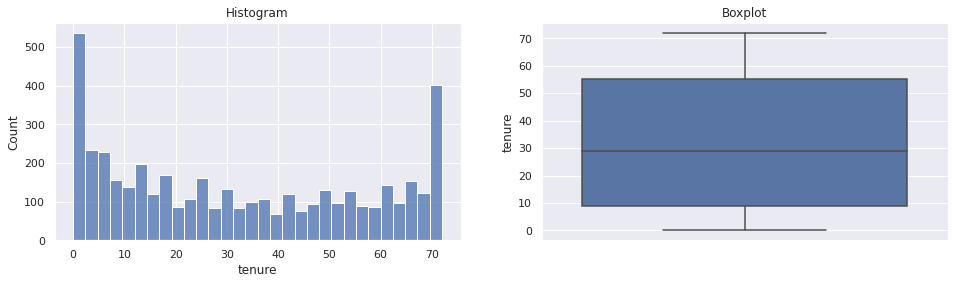

Skewness Value :  0.2489530994156094

Distribusi MonthlyCharges


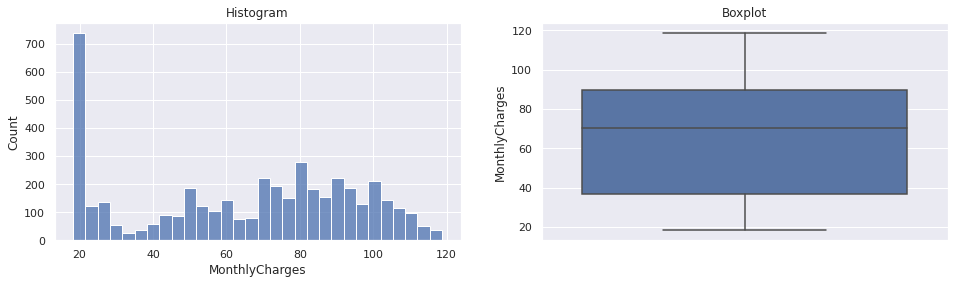

Skewness Value :  -0.22568207687035752

Distribusi TotalCharges


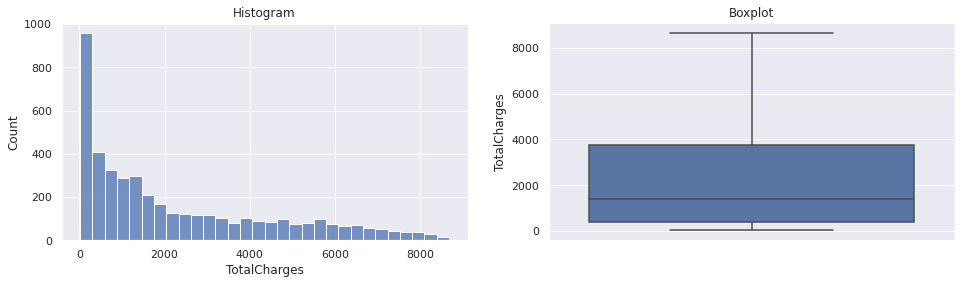

Skewness Value :  0.968521535313802



In [189]:
# Columns numerical is 'tenure', 'MonthlyCharges', 'TotalCharge'
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for columns in cols:
    print(f'Distribusi {columns}')
    diagnostic_plots(X_train, columns)
    print('Skewness Value : ', X_train[columns].skew())
    print('')


Well we can see from distribution plot, columns that have a skewed just column TotalCharges. This preprocessing will not handling outliers, cause the column just have moderately skew, but in scaling will be treat with MinMaxScaler for handle the outliers.

## Feature Selection

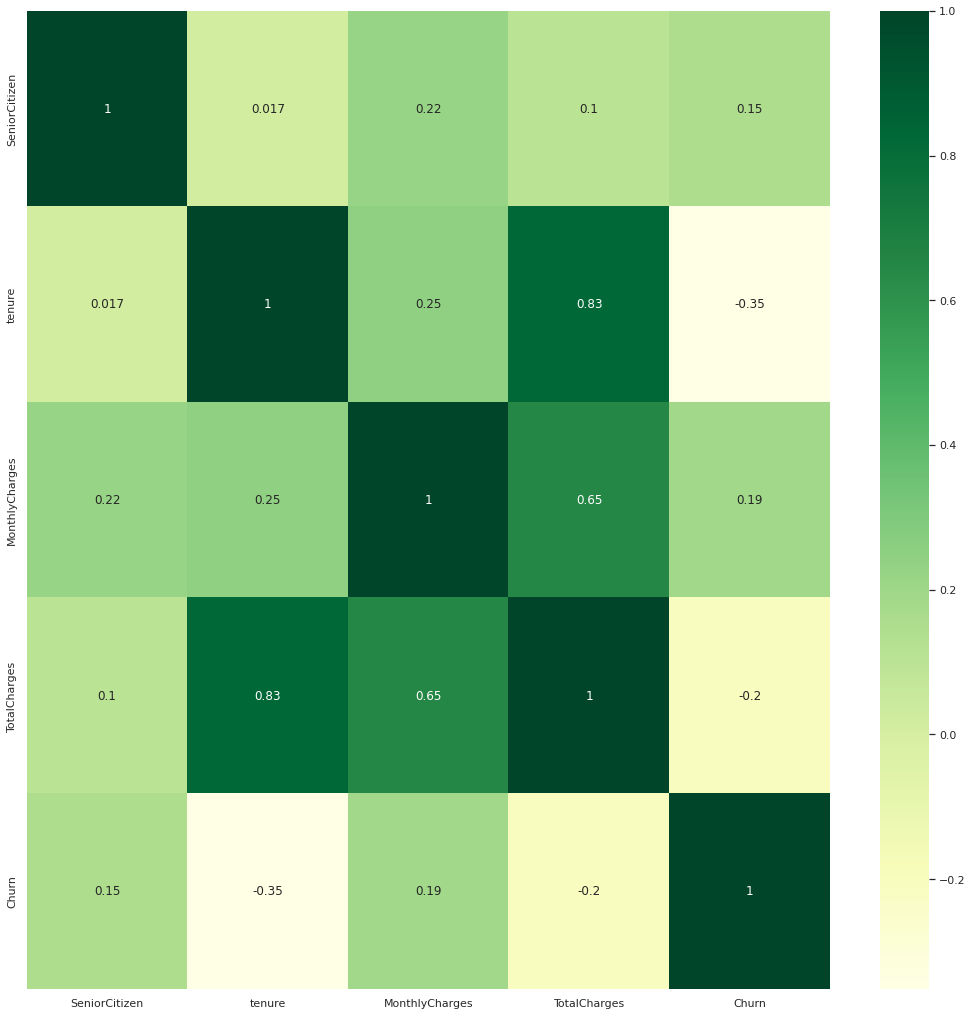

In [190]:
# See corelation to target with heatmap
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(data=data_copy.corr(), annot=True, cmap='YlGn')

There's no columns i will drop. Because i want to know result model with Deep Learning with all features.

## Split Between Numerical columns and Categorical columns

In [191]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Combines three categoy into one
final_features = num_columns + cat_columns

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Well we do categorizing data Numerik and Categoric

## Feature Engineering

In [192]:
# declare MinMaxScaler
mm_sc = MinMaxScaler()

# declare one hot encoder
ohe_enc = OneHotEncoder(handle_unknown='ignore')

# declare label encoder
label_enc = LabelEncoder()

# declare ordinal encoder
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# create smotenc object
# categorical features will be put at the end, after the numerical ones
smotenc = SMOTENC(
    categorical_features= list(range(7, 19)),
    random_state=random_state
)

Defining an Encoding and Scaling, also SMOTE to improve our model.

### Create Pipline Imputer, Scaler, and Encoder

In [193]:
# Column Transformer
fe = ColumnTransformer([
    ('ohe_enc', ohe_enc, cat_columns),
    ('scaling', mm_sc, num_columns)
])



Make some structure data with Pipeline Column Transformer

### Encoding and Scaling

In [194]:
X_train_scale_enc = fe.fit_transform(X_train)
X_val_scale_enc = fe.transform(X_val)
X_test_scale_enc = fe.transform(X_test)

print('X_train_scale_enc shape berfore oversampling:', X_train_scale_enc.shape)
print('y_train shape berfore oversampling          :', y_train.shape)
print('X_val_scale_enc shape berfore oversampling:', X_val_scale_enc.shape)
print('y_val shape berfore oversampling          :', y_val.shape)

X_train_scale_enc shape berfore oversampling: (4443, 45)
y_train shape berfore oversampling          : (4443,)
X_val_scale_enc shape berfore oversampling: (1111, 45)
y_val shape berfore oversampling          : (1111,)


After we got a Pipeline, then dataset transform, the result will be array.

### Oversampling

Since our data is imbalance, we need to perform oversampling

In [195]:
# oversampling using SMOTE
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_scale_enc, y_train)
X_val_balanced, y_val_balanced = smotenc.fit_resample(X_val_scale_enc, y_val)


# print shape after oversampling
print('X_train_balanced shape after oversampling:', X_train_balanced.shape)
print('y_train_balanced shape after oversampling:', y_train_balanced.shape)
print('X_val_balanced shape after oversampling:', X_val_balanced.shape)
print('y_val_balanced shape after oversampling:', y_val_balanced.shape)

X_train_balanced shape after oversampling: (6596, 45)
y_train_balanced shape after oversampling: (6596,)
X_val_balanced shape after oversampling: (1614, 45)
y_val_balanced shape after oversampling: (1614,)


The data have balanced with SMOTENC.

## Input Pipeline


In [196]:
AUTOTUNE = tf.data.AUTOTUNE

In [197]:
def preprocessing(data, label):
    
    """function that takes the data and labels, 
    standarize the data and return the standarized
    data and the labels"""
    
    mean = tf.reduce_mean(data, axis=0)
    std = tf.math.reduce_std(data, axis=0)
    
    preprocessed_data = (data - mean) / std
    
    return preprocessed_data, label



In [198]:
def get_batches(x, y, shuffle_buffer_size, batch_size, shuffle=False):
    
    #Building a pipeline from a data that exists in memory
    data_ds = tf.data.Dataset.from_tensor_slices((x, y))
    #mapping the fuction we alredy made to the data
    preprocessed_data = data_ds.map(preprocessing)
    
    
    if shuffle:
        # if we want to shuffle the dataset given a buffer size
        shuffled_data = preprocessed_data.shuffle(shuffle_buffer_size)
        
        # prefetch` lets the dataset fetch batches in the background while the model is training.
        data_batches = shuffled_data.batch(batch_size).cache().prefetch(AUTOTUNE) #berapa banyak batch yg ingin di prefetch
        
    else: 
        
        data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)
    
    
    return data_batches 

In [199]:
# Pipeline before oversampling
training_batches = get_batches(X_train_scale_enc, y_train, 1024, 64, shuffle=True)
validation_batches = get_batches(X_val_scale_enc, y_val, 256, 64, shuffle=False)

# Pipeline before oversampling
training_batches_balanced = get_batches(X_train_balanced, y_train_balanced, 1024, 64, shuffle=True)
validation_batches_balanced = get_batches(X_val_balanced, y_val_balanced, 256, 64, shuffle=False)

# Pipeline data test
testing_batches = get_batches(X_test_scale_enc, y_test, 256, 64, shuffle=False)


We use Pipeline tensor to do better result later:
- because data before training will shuffle with 1024 time, 256 times and 256 times each train, validation, and test data.
- split the batch into 64 groups
- all will do for better running time training, have some result steady not spike, and have a better score.

# 6 - Model Definition

## Sequential API

In [200]:
model_seq = keras.models.Sequential([
    keras.layers.Input(shape=(45,), ),
    keras.layers.Dense(360,
                      activation='relu',
                      kernel_regularizer=tf.keras.regularizers.L2(),
                      kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)
                       ),
    keras.layers.BatchNormalization(),
    # keras.layers.Dropout(rate = 0.15),
    # keras.layers.Activation('relu'),
    keras.layers.Dense(180, 
                      activation='relu',
                      kernel_regularizer=tf.keras.regularizers.L2(),
                      kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)
                       ),
    keras.layers.BatchNormalization(),
    # keras.layers.Dropout(rate = 0.15),
    # keras.layers.Activation('relu'),
    keras.layers.Dense(1, activation="sigmoid")
])

model_seq.compile(loss=keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0008),
             metrics=[tf.keras.metrics.Recall()])


This is first research Deep Learning with Sequential and i got perfect result base on graph after trial and error:
1. Input 45 base on feature that i got after encoding
2. Use 2 hidden layers, i think that's will be good in result
3. in each hidden layer use Activation "Relu" most use, kernel regulizer L2 it is depend on loss that i got, kernel initialize use RandomNormal because with that RandomNormal the graph steady
4. Use layers BatchNormalization is effect to graph be more steady result
5. Target is binary classification 0 and 1 absolutely use 'sigmoid'
6. In compile used loss binary_crossentropy base on target is binary, Optimizer use Nadam because it is best to control exploding with learning rate 0.0008.
7. metrics use recall because the dataset is imbalance so it is better use recall base on equation FN. 

In [201]:
model_seq.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 360)               16560     
                                                                 
 batch_normalization_6 (Batc  (None, 360)              1440      
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 180)               64980     
                                                                 
 batch_normalization_7 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 1)                 181       
                                                                 
Total params: 83,881
Trainable params: 82,801
Non-trai

After i define a sequential model, so i got summay that will have total params 83,881 and trainable params 82,801.

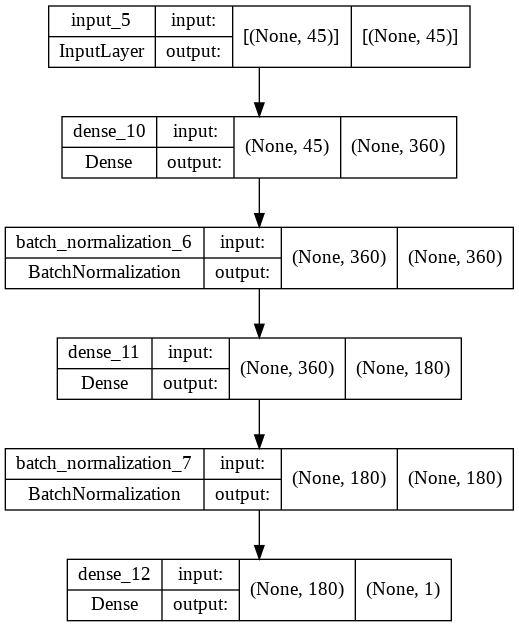

In [202]:
keras.utils.plot_model(model_seq, "telco_costumer_churn_model_sequential.png", show_shapes=True)

The order of work in sequential is a series

## Functional API

In [203]:
model_input = tf.keras.Input(shape=(45,))

x1 = tf.keras.layers.Dense(360, 
                          activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L2(),
                          kernel_initializer=keras.initializers.RandomNormal(stddev=0.5))(model_input)

x2 = tf.keras.layers.BatchNormalization()(x1)

# x = tf.keras.layers.Dense(180, 
#                           activation='relu',
#                           kernel_regularizer=tf.keras.regularizers.L2(),
#                           kernel_initializer=keras.initializers.RandomNormal(stddev=0.5))(x)

# x = tf.keras.layers.BatchNormalization()(x)
concat = keras.layers.concatenate([model_input, x2])
model_output = tf.keras.layers.Dense(1, activation='sigmoid')(concat)

model_func = tf.keras.models.Model(inputs=model_input, outputs=model_output)

model_func.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0008),
             metrics=[tf.keras.metrics.Recall()])

I do different research for functional API, i just change hidden layer be 1 hidden layer from 2 hidden layer that i have made from sequential API.

In [204]:
model_func.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 45)]         0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 360)          16560       ['input_6[0][0]']                
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 360)         1440        ['dense_13[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 concatenate_2 (Concatenate)    (None, 405)          0           ['input_6[0][0]',          

Well Total params 18,406 and Trainable params 17,686 it is it is greatly reduced from sequential model.

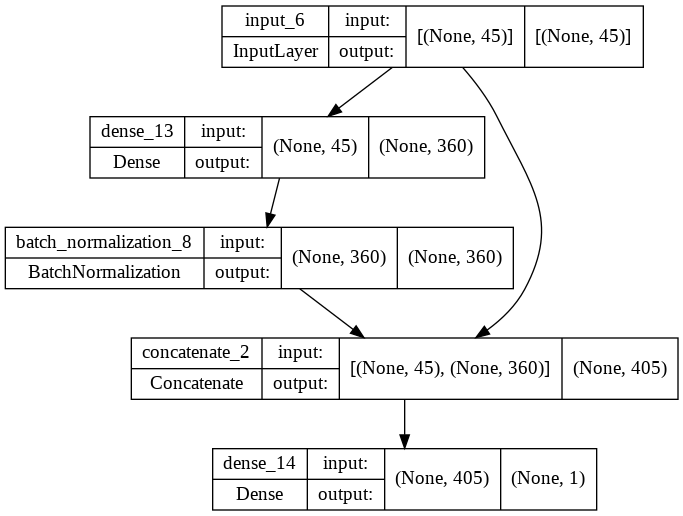

In [205]:
keras.utils.plot_model(model_func, "telco_costumer_churn_model_functional.png", show_shapes=True)

The model sequetial of model functional tasks is different from sequential, parallel functional types because there is a concatenate that is made to wrap the input and hidden layers into one.

# 7 - MODEL TRAINING

## Sequentional API

### Training without pipeline and balancing

In [206]:
history_seq = model_seq.fit(X_train_scale_enc, y_train, 
         epochs=100, 
         validation_data=(X_val_scale_enc, y_val)
         )

history_seq

Epoch 1/100
139/139 [==============================] - 3s 7ms/step - loss: 172.7067 - recall_4: 0.4786 - val_loss: 144.6838 - val_recall_4: 0.3717
Epoch 2/100
139/139 [==============================] - 1s 8ms/step - loss: 122.9153 - recall_4: 0.4297 - val_loss: 103.2515 - val_recall_4: 0.4638
Epoch 3/100
139/139 [==============================] - 1s 8ms/step - loss: 87.8684 - recall_4: 0.4690 - val_loss: 73.9444 - val_recall_4: 0.4408
Epoch 4/100
139/139 [==============================] - 1s 8ms/step - loss: 62.9796 - recall_4: 0.4716 - val_loss: 53.0532 - val_recall_4: 0.3882
Epoch 5/100
139/139 [==============================] - 1s 7ms/step - loss: 45.1920 - recall_4: 0.4961 - val_loss: 38.0839 - val_recall_4: 0.4868
Epoch 6/100
139/139 [==============================] - 1s 7ms/step - loss: 32.4413 - recall_4: 0.5083 - val_loss: 27.3697 - val_recall_4: 0.4638
Epoch 7/100
139/139 [==============================] - 1s 8ms/step - loss: 23.2959 - recall_4: 0.5231 - val_loss: 19.6722 - va

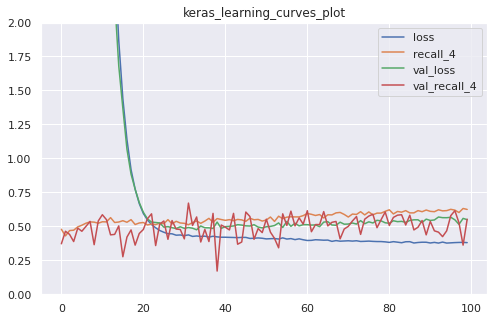

In [207]:
pd.DataFrame(history_seq.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("keras_learning_curves_plot")
plt.show()

Well i do training without input pipeline the result between loss and vall loss it is clearly best fit. But we can see from metrics val_recall it so exploding (before i input learning rate the result is more explosive than that), and still best fit other recall and val_recall. 

### Training with pipeline before balancing

In [208]:
history_seq = model_seq.fit(training_batches, 
         epochs=100, 
         validation_data=(validation_batches)
         )

history_seq

Epoch 1/100
70/70 [==============================] - 2s 10ms/step - loss: 0.4281 - recall_4: 0.5799 - val_loss: 0.5452 - val_recall_4: 0.6414
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 0.3970 - recall_4: 0.5764 - val_loss: 0.5005 - val_recall_4: 0.5625
Epoch 3/100
70/70 [==============================] - 0s 6ms/step - loss: 0.3853 - recall_4: 0.5843 - val_loss: 0.4948 - val_recall_4: 0.5000
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 0.3773 - recall_4: 0.5974 - val_loss: 0.4964 - val_recall_4: 0.4737
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 0.3718 - recall_4: 0.6079 - val_loss: 0.5012 - val_recall_4: 0.4539
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: 0.3660 - recall_4: 0.6227 - val_loss: 0.5054 - val_recall_4: 0.4507
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 0.3613 - recall_4: 0.6253 - val_loss: 0.5117 - val_recall_4: 0.4572
Epoch 8/100


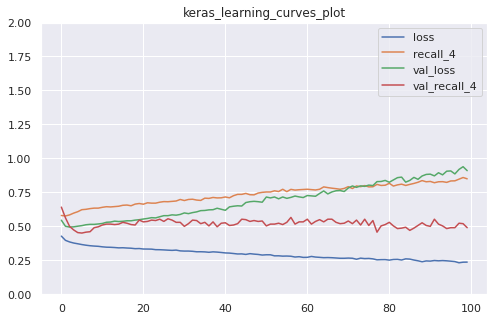

In [209]:
pd.DataFrame(history_seq.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("keras_learning_curves_plot")
plt.show()

Model sequential improvement use pipeline more better than not use. As we can see from the graph val_recall more steady than not use pipeline. They remain bestfit after using pipeline 

### Training with pipeline after balancing

In [210]:
history_seq_balanced = model_seq.fit(training_batches_balanced, 
         epochs=100, 
         validation_data=(validation_batches_balanced)
         )

history_seq_balanced

Epoch 1/100
104/104 [==============================] - 1s 7ms/step - loss: 0.5824 - recall_4: 0.7674 - val_loss: 3.5917 - val_recall_4: 0.9913
Epoch 2/100
104/104 [==============================] - 1s 6ms/step - loss: 0.6764 - recall_4: 0.7868 - val_loss: 2.4901 - val_recall_4: 0.9926
Epoch 3/100
104/104 [==============================] - 1s 6ms/step - loss: 0.6444 - recall_4: 0.7962 - val_loss: 2.0322 - val_recall_4: 0.9851
Epoch 4/100
104/104 [==============================] - 1s 6ms/step - loss: 0.6181 - recall_4: 0.7784 - val_loss: 1.6073 - val_recall_4: 0.9789
Epoch 5/100
104/104 [==============================] - 1s 6ms/step - loss: 0.5964 - recall_4: 0.8014 - val_loss: 1.2356 - val_recall_4: 0.9777
Epoch 6/100
104/104 [==============================] - 1s 6ms/step - loss: 0.5677 - recall_4: 0.7874 - val_loss: 1.1912 - val_recall_4: 0.9628
Epoch 7/100
104/104 [==============================] - 1s 6ms/step - loss: 0.5812 - recall_4: 0.7905 - val_loss: 1.0790 - val_recall_4: 0.9579

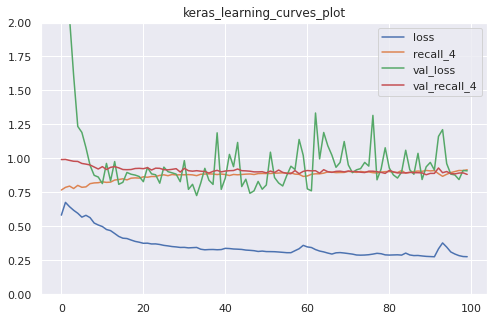

In [211]:
pd.DataFrame(history_seq_balanced.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("keras_learning_curves_plot")
plt.show()

I don't know why, after i did improvement with oversampling data the graph val_loss even more exploding, so better not use oversampling with model sequential 2 hidden layers.

## Functional API

### Train without pipeline and balancing

In [212]:
history_func = model_func.fit(X_train_scale_enc, y_train, 
         epochs=100, 
         validation_data=(X_val_scale_enc, y_val)
         )

history_func

Epoch 1/100
139/139 [==============================] - 2s 8ms/step - loss: 35.6921 - recall_5: 0.5048 - val_loss: 30.0718 - val_recall_5: 0.3454
Epoch 2/100
139/139 [==============================] - 1s 5ms/step - loss: 25.6888 - recall_5: 0.4541 - val_loss: 21.7399 - val_recall_5: 0.4441
Epoch 3/100
139/139 [==============================] - 1s 4ms/step - loss: 18.6145 - recall_5: 0.4751 - val_loss: 15.8032 - val_recall_5: 0.4507
Epoch 4/100
139/139 [==============================] - 1s 4ms/step - loss: 13.5566 - recall_5: 0.4655 - val_loss: 11.5340 - val_recall_5: 0.4474
Epoch 5/100
139/139 [==============================] - 1s 4ms/step - loss: 9.9031 - recall_5: 0.5004 - val_loss: 8.4549 - val_recall_5: 0.4539
Epoch 6/100
139/139 [==============================] - 1s 4ms/step - loss: 7.2656 - recall_5: 0.5031 - val_loss: 6.2323 - val_recall_5: 0.4375
Epoch 7/100
139/139 [==============================] - 1s 4ms/step - loss: 5.3599 - recall_5: 0.5074 - val_loss: 4.6219 - val_recall_5

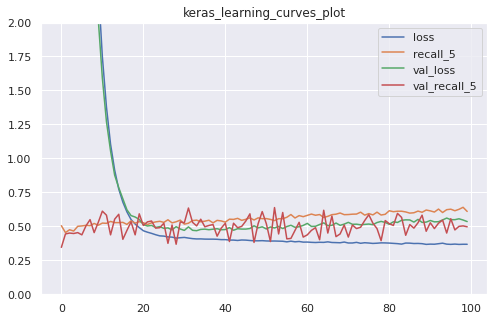

In [213]:
pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("keras_learning_curves_plot")
plt.show()

Now functional API without pipeline we use 1 hidden layer, not much different from sequential val_recall still exploding but not extreme, so it is better than sequential.

### Training with Pipeline before balancing

In [214]:
history_func = model_func.fit(training_batches, 
         epochs=100, 
         validation_data=(validation_batches)
         )

history_func



Epoch 1/100
70/70 [==============================] - 1s 8ms/step - loss: 0.5678 - recall_5: 0.6489 - val_loss: 0.6168 - val_recall_5: 0.3783
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4167 - recall_5: 0.5624 - val_loss: 0.5701 - val_recall_5: 0.3717
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3996 - recall_5: 0.5843 - val_loss: 0.5517 - val_recall_5: 0.3914
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3910 - recall_5: 0.5913 - val_loss: 0.5373 - val_recall_5: 0.4342
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3855 - recall_5: 0.5948 - val_loss: 0.5301 - val_recall_5: 0.4671
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3812 - recall_5: 0.6000 - val_loss: 0.5258 - val_recall_5: 0.4868
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3779 - recall_5: 0.6044 - val_loss: 0.5252 - val_recall_5: 0.5000
Epoch 8/100
7

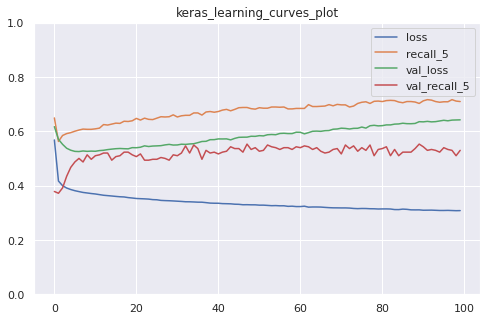

In [215]:
pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("keras_learning_curves_plot")
plt.show()

Functional API use pipeline more better than not use, but val_loss the more epochs the higher the value out of global minimum.

### Training with Pipeline after Balancing

In [216]:
history_func_balanced = model_func.fit(training_batches_balanced, 
         epochs=100, 
         validation_data=(validation_batches_balanced)
         )

history_func_balanced

Epoch 1/100
104/104 [==============================] - 1s 5ms/step - loss: 0.3565 - recall_5: 0.8396 - val_loss: 1.0976 - val_recall_5: 0.9529
Epoch 2/100
104/104 [==============================] - 1s 5ms/step - loss: 0.4179 - recall_5: 0.8666 - val_loss: 1.0062 - val_recall_5: 0.9418
Epoch 3/100
104/104 [==============================] - 1s 5ms/step - loss: 0.3983 - recall_5: 0.8657 - val_loss: 0.8351 - val_recall_5: 0.9244
Epoch 4/100
104/104 [==============================] - 1s 5ms/step - loss: 0.3808 - recall_5: 0.8754 - val_loss: 0.7467 - val_recall_5: 0.9120
Epoch 5/100
104/104 [==============================] - 1s 5ms/step - loss: 0.3630 - recall_5: 0.8802 - val_loss: 0.6968 - val_recall_5: 0.8934
Epoch 6/100
104/104 [==============================] - 1s 5ms/step - loss: 0.3490 - recall_5: 0.8881 - val_loss: 0.6784 - val_recall_5: 0.8835
Epoch 7/100
104/104 [==============================] - 0s 5ms/step - loss: 0.3400 - recall_5: 0.8918 - val_loss: 0.6719 - val_recall_5: 0.8872

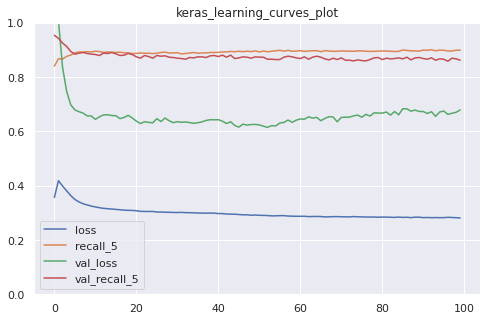

In [217]:
pd.DataFrame(history_func_balanced.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("keras_learning_curves_plot")
plt.show()

Well more better when we did improvement with oversampling and use pipeline in model functional API. That we can see above are result are steady and got bestfit each other.

# 8 - MODEL EVALUATION

## Sequentional API

In [218]:
model_seq.evaluate(testing_batches)

22/22 [==============================] - 0s 4ms/step - loss: 1.3764 - recall_4: 0.8473


[1.3764241933822632, 0.847328245639801]

From evaluate tensorflow, result show recall - 84% it is good result, but we can't satisfied just see result evaluate, we should see classification report and ROC-AUC for more detail result.

In [219]:
yp_seq = model_seq.predict(testing_batches)
yp_seq[:20]

array([[1.9215992e-12],
       [9.9098969e-01],
       [7.2954033e-05],
       [3.9596967e-02],
       [2.4407892e-01],
       [5.6232471e-07],
       [4.7176954e-01],
       [1.8873870e-01],
       [9.2950863e-01],
       [8.4779316e-01],
       [9.9699980e-01],
       [5.4691583e-01],
       [3.1624177e-01],
       [2.8653597e-02],
       [9.9999952e-01],
       [8.1845014e-21],
       [1.4541050e-02],
       [1.2931061e-01],
       [9.9080539e-01],
       [0.0000000e+00]], dtype=float32)


To compare the predicted values with the actual values, we assume any predicted value >= 0.5 as 1 and others as 0

In [243]:
# change predict proba to label
y_pred_seq = []
for element in yp_seq:
  if element>0.5:
    y_pred_seq.append(1)
  else:
    y_pred_seq.append(0)

In [221]:
y_pred_seq[:20]

[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]

In [222]:
# prepare target names for classification report
target_names = ["No", "Yes"]

In [223]:
y_test

5863    0
3557    1
2891    0
3027    0
5869    0
       ..
4992    0
776     0
1780    0
5002    1
4645    0
Name: Churn, Length: 1389, dtype: int64

In [248]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
print('Classification Report (Model Sequential)')
print(classification_report(y_test, y_pred_seq, target_names=target_names))

Classification Report (Model Sequential)
              precision    recall  f1-score   support

          No       0.90      0.57      0.70       996
         Yes       0.43      0.85      0.57       393

    accuracy                           0.65      1389
   macro avg       0.67      0.71      0.64      1389
weighted avg       0.77      0.65      0.66      1389



In [247]:
# Performance Metrics ROC-AUC after grid
print('==================== Test Results (Model Sequential) ====================')
print(roc_auc_score(y_test, y_pred_seq))


==================== Test Results (Model Sequential) ====================
0.7062946442257579


We got a metrics Classification Report from model sequential:
- Base on Recall it is good to predict probably Churn (Yes) with result 85%
- but base on accuracy it is bad result that we have 65% so there is much bias predict in this model

We got a metrics ROC-AUC from model sequential:
- We got result 0.7062946442257579 it is best result for imbalance after we did improvement with pipeline and oversampling in data train.


## Functional API

In [251]:
model_func.evaluate(testing_batches)

22/22 [==============================] - 0s 2ms/step - loss: 0.8401 - recall_5: 0.7939


[0.8400903344154358, 0.7938931584358215]

Evaluate from functional API result more less then sequential, but base on the history graph functional API is the best model for the result. So we should know more metrics in Classification Report and ROC-AUC below!

In [252]:
yp_func = model_func.predict(testing_batches)
yp_func[:20]

array([[2.98281759e-03],
       [9.52835023e-01],
       [7.73284491e-03],
       [4.70368650e-05],
       [7.51414821e-02],
       [1.19382203e-04],
       [2.32516392e-03],
       [7.71772325e-01],
       [5.07375360e-01],
       [6.16621137e-01],
       [9.50887740e-01],
       [4.59572388e-04],
       [1.54150445e-02],
       [3.36088677e-04],
       [9.21007276e-01],
       [3.61002237e-03],
       [7.22094728e-06],
       [1.23777613e-01],
       [9.49461460e-01],
       [2.88213938e-02]], dtype=float32)


To compare the predicted values with the actual values, we assume any predicted value >= 0.5 as 1 and others as 0

In [253]:
y_pred_func = []
for element in yp_func:
  if element>0.5:
    y_pred_func.append(1)
  else:
    y_pred_func.append(0)

In [254]:
y_pred_func[:20]

[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [255]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
print(classification_report(y_test, y_pred_func, target_names=target_names))

              precision    recall  f1-score   support

          No       0.89      0.66      0.76       996
         Yes       0.48      0.79      0.60       393

    accuracy                           0.70      1389
   macro avg       0.69      0.73      0.68      1389
weighted avg       0.77      0.70      0.71      1389



In [256]:
# Performance Metrics ROC-AUC after grid
print('==================== Test Results (Model Functional) ====================')
print(roc_auc_score(y_test, y_pred_func))


==================== Test Results (Model Functional) ====================
0.7272678500260584


We got a metrics Classification Report from model sequential:
- Base on Recall it is good to predict probably Churn (Yes) with result 79% according to the results of the evaluation above
- but base on accuracy it is better result than model sequential that we have 70% so there is much bias predict in this model

We got a metrics ROC-AUC from model sequential:
- We got result 0.7272678500260584 it is best result for imbalance after we did improvement with pipeline and oversampling in data train.
- functional API more better model than sequential


# 9 - MODEL SAVING

Base on result Evaluation metrics in Classification Report and ROC-AUC, we got best model use to data inference is model Functional API. 


## Model Freeze

In [232]:
# freeze model
for layer in model_seq.layers:
  layer.trainable = False


# freeze model
for layer in model_func.layers:
  layer.trainable = False

In [233]:
model_seq.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 360)               16560     
                                                                 
 batch_normalization_6 (Batc  (None, 360)              1440      
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 180)               64980     
                                                                 
 batch_normalization_7 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 1)                 181       
                                                                 
Total params: 83,881
Trainable params: 0
Non-trainable

AFter freeze model that will saving for data inference there is no Trainable params.

In [234]:
# # prepare directory for saving model
with open('fe.pkl', 'wb') as file_1:
  joblib.dump(fe, file_1)
model_seq.save('model_seq')
model_func.save('model_func')

INFO:tensorflow:Assets written to: model_seq/assets
INFO:tensorflow:Assets written to: model_func/assets


# 10 - MODEL INFERENCE

## Load The Model

In [235]:
# Model load

with open('fe.pkl', 'rb') as file_1:
  fe = joblib.load(file_1)
model_seq = tf.keras.models.load_model('model_seq')
model_func = tf.keras.models.load_model('model_func')


In [236]:
# Check the contents of the model
model_func

In [237]:
# display inference set
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),86.55,1857.25,0
1,Male,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.60,901.25,0
2,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.00,5999.85,0
3,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.20,19.20,0
4,Male,0,Yes,No,22,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,No,Month-to-month,No,Credit card (automatic),95.90,2234.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,1,Yes,No,61,Yes,Yes,DSL,No,Yes,No,No,No,Yes,One year,No,Bank transfer (automatic),64.05,3902.60,0
96,Male,0,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,74.95,151.75,0
97,Female,0,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,0
98,Male,0,Yes,Yes,13,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),44.80,559.20,0


Call data inference that i set from data preprocessing, i drop 100 data from a raw data to be data inference.

## Inferencing

In [238]:
# prepare data for inferencing
data_inf_prepared = data_inf.drop(columns=['Churn'])

# print shape of prepared data
print(data_inf_prepared.shape)

(100, 19)


Then drop the target first

## Prediction

In [239]:
# scale and encode the inference set
data_inf_scaled_enc = fe.transform(data_inf_prepared)
data_inf_scaled_enc


array([[0.        , 1.        , 0.        , ..., 0.29166667, 0.67960199,
        0.21244793],
       [0.        , 1.        , 1.        , ..., 0.48611111, 0.07313433,
        0.10197431],
       [1.        , 0.        , 0.        , ..., 0.98611111, 0.63432836,
        0.69115922],
       ...,
       [1.        , 0.        , 0.        , ..., 0.15277778, 0.02338308,
        0.02485656],
       [0.        , 1.        , 0.        , ..., 0.18055556, 0.2641791 ,
        0.06244764],
       [0.        , 1.        , 0.        , ..., 0.93055556, 0.01144279,
        0.14622731]])

Also do what i am doing in model training, scaling and encoding with column transformer that i have done.

In [240]:
# Determines prediction result
y_inf_pred_func = model_func.predict(data_inf_scaled_enc)
y_inf_pred_func.shape

(100, 1)

Well do a predict

In [241]:
y_inf_func = []
for element in y_inf_pred_func:
  if element>0.5:
    y_pred_func.append(1)
  else:
    y_pred_func.append(0)

In [242]:
y_pred_func[:20]

[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]

Wala! My model is working! 

# 11 - CONCLUSION

## On EDA

- Churn is the loss of customers from a business. Churn is calculated by how many customers leave your business in a given time. Customer turnover is important for businesses to know because it is a picture of the success of a business in retaining customers. 
- Some Costumer in logic they will churn because their charge is too big or maybe they are can not pay for their charge next month depends tenure. Talking about invoices in other words the column is numeric, so the columns associated with the bill are 'Tenure', 'MonthlyCharges', 'TotalCharges'
- It is proven that customers have a high potential for Churn is on their charges, where those who take a short tenure will have a higher Churn potential compared to the old Tenure.
- However, customers with any subscription have a very small correlation with Churn's customer potential


## On Modeling

- The model functional is best result thand sequential
- On Functional API we just have steady result Recall that the model can not improve more high the result because the data is small
- In this dataset better with 1 hidden layer
- base on Accuracy and ROC-AUC data imbalance that already predict with model Functional still bias
- The utility of the pipeline and the oversampling perform here are very important to regulate the nature of the output

## Implication

- The dataset too small not very suitable if predicted with ANN enough with Machine Learning model.
- Need more research for get best result model with apply or replace a parameters in ANN
- Our model just have 70% rate to predicting, therefore while it may be run, we still need to improve it.
- Give a costumer best offering about charges and tenure.

## Futere Improvement

- Consider running hyperparameter tuning on more parameters
- Use other scaling, or maybe need handling outliers
- Get more research and trial and eror for get a best result
- Add more datasets for more accurate ANN modeling
